# Homework 5

## Due Date: Thursday 6/22 11:59pm

Instruction
The homework solution should be uploaded on e-campus. 
You can submit it as often as you like before the deadline. 
You need to upload the jupyter notebook `.ipynb`  file with your answers plus an `.html` file, which 
will serve as a backup for us in case the `.ipynb` file cannot be opened on my or the TA’s computer. 
Make sure to not commit any data to e-campus classroom. 
All tasks can be done in a single jupyter notebook.

# Classification, dimensionality reduction, and unsupervised clustering on the ‘hand-written digits’ dataset [100 Pts]


You can load the dataset with 

In [1]:
from sklearn.datasets import load_digits

The digits consist of 1,797 samples with 64 features, where each of the 64 features (64-dimensional)
is the brightness of one pixel in an 8×8 image.

**1.1. [10 Pts] After loading the dataset, visualize the first few digits datasets (like below):**

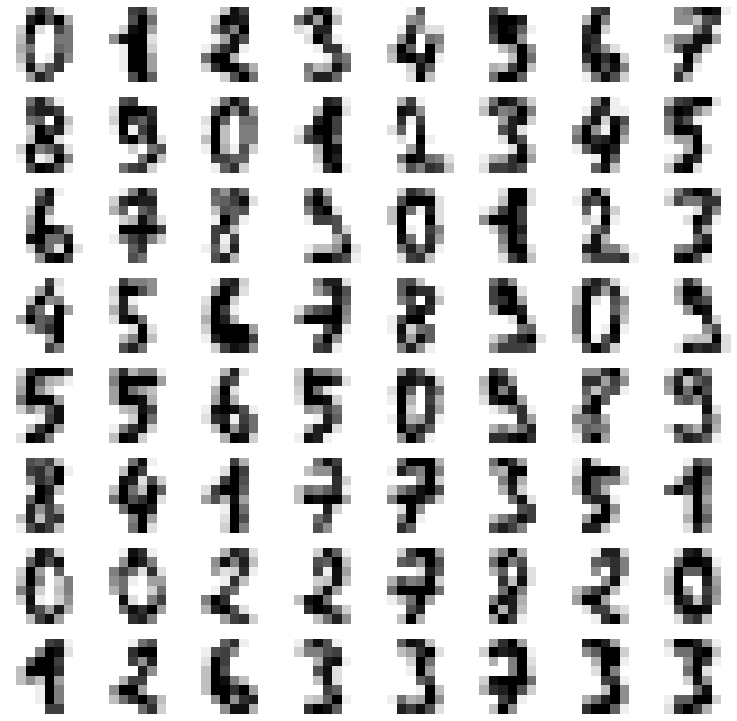

In [19]:
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()

fig = plt.figure(figsize = (13, 13))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.set_axis_off()
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest') 

**1.2. [15 Pts] Classify the digits using random forest.**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2, random_state=42)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [32]:
train_scores = []
test_scores = []

rf = RandomForestClassifier(warm_start=True, random_state=0)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

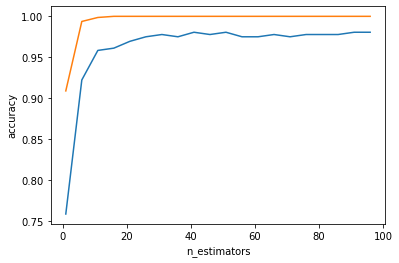

In [36]:
plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.show()

**1.3. [10 Pts] Show the classification report and discuss the results.**

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

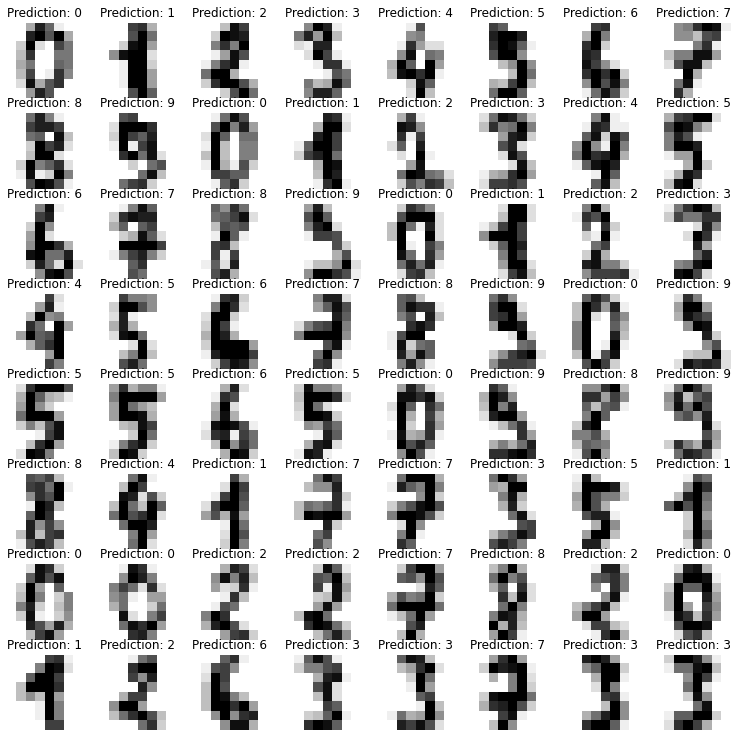

In [49]:
y = rf.predict(data)
fig = plt.figure(figsize=(13, 13))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.set_axis_off()
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest') 
    ax.set_title(f'Prediction: {y[i]}')
    
# Discussion : 예측값의 정확도가 매우 높고 오류가 거의 없다고 볼 수 있습니다.

**1.4. [10 Pts] Plot confusion matrix and discuss the results.**

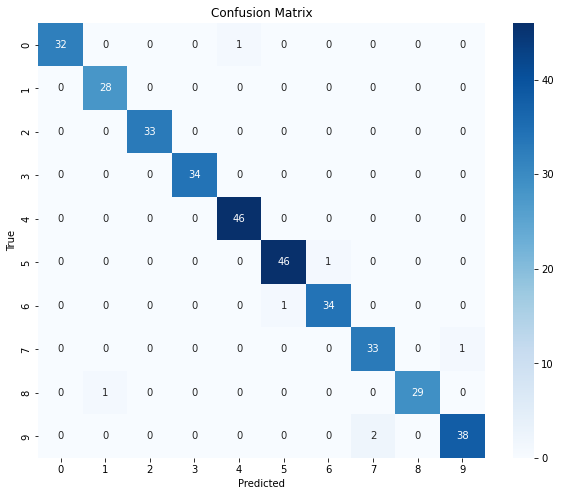

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Discussion : 위에서 확인했듯이 오류가 거의 없는 편입니다.
# 다만 그 중에서 빈번하게 일어나는 오류는 9를 7로 잘못 예측하는 경우입니다.

**1.5. [10 Pts] Apply PCA to the digits dataset to project them to 2 dimensions and visualize the first
two components (2d scatter plot). Discuss the results.**

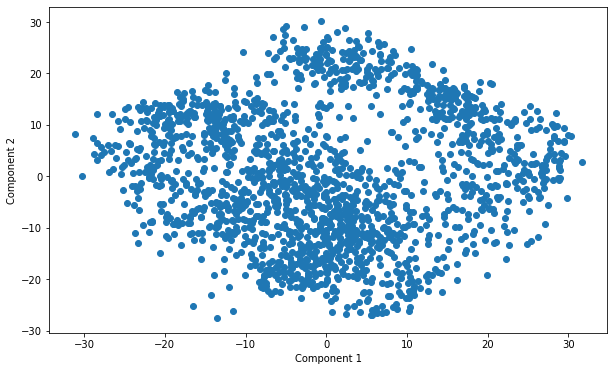

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(digits.data)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

**1.6. [10 Pts] A vital part of using PCA in practice is the ability to estimate how many components are
needed to describe the data. This can be determined by looking at the cumulative explained variance 
ratio as a function of the number of components. Plot the "cumulative explained variance ratio (yaxis)” as a function of “number of component” (x-axis).**

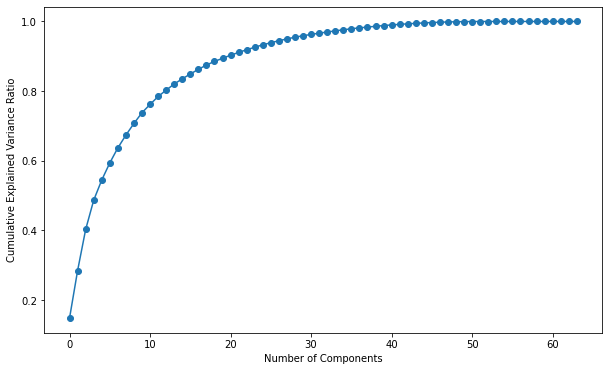

In [25]:
pca = PCA()
X_pca = pca.fit_transform(digits.data)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

**1.7. [15 Pts] You will apply k-means on the same simple digits data to try to identify similar digits 
without using the original label information; this might be similar to a first step in extracting meaning 
from a new dataset about which you don’t have any a prior label information. Apply k-means
clustering to the digits dataset with 10 clusters.**

`kmeans.cluster_centers_.shape`

(10, 64)


The result will be 10 clusters and 64 dimensions. Notice that the cluster centers themselves are 64-
dimenstional points, and themselves be interpreted as the “typical” digit within the cluster. Visualize 
what these cluster centers look like (plot 10 different digits images like below). Hint: reshape 
`kmeans.cluster_centers_` to create the digits images. And discuss the results.

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init = 10, random_state=0)
kmeans.fit(digits.data)

kmeans.cluster_centers_.shape

(10, 64)

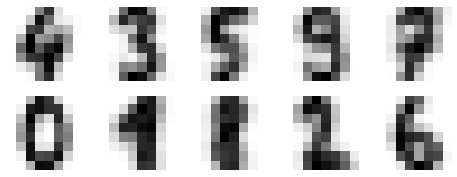

In [47]:
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))

for axi, center in zip(ax.flat, centers):
    axi.set_axis_off()
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap=plt.cm.binary, interpolation='nearest')
    
# Discussion : Kmeans는 label 없이도 centers가 인식 가능한 숫자 cluster를 찾을 수 있습니다.
# 다만 1과 8은 구분하기에 어려움이 있습니다.

**1.8. [10 Pts] Because k-means knows nothing about the identity (label) of the cluster, the 0-9 labels
may be permuted. Fix this by matching each learned cluster label with the true labels and check how
accurate our unsupervised clustering is in finding similar digits within the data. Hint:
accuracy_score**

In [30]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

clusters = kmeans.fit_predict(digits.data)
labels = np.zeros_like(clusters)

for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

accuracy = accuracy_score(digits.target, labels)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7935447968836951


**1.9. [10 Pts] With just a simple k-means algorithm, we can discover the correct groups for [your
accuracy score in 1.8] of the input digits. Plot the confusion matrix and check for this and discuss the
results.**

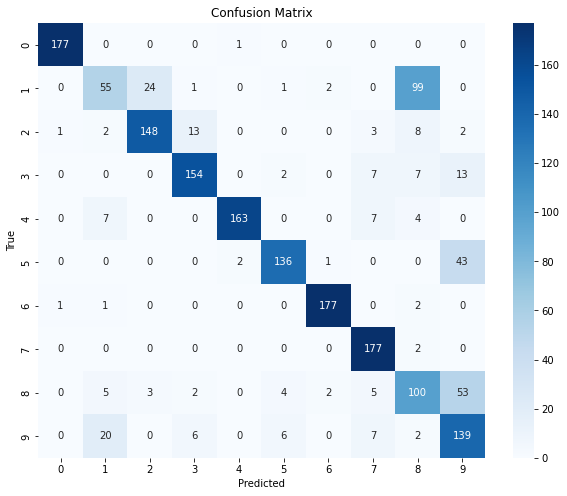

In [50]:
cm = confusion_matrix(digits.target, labels)

plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Discussion : 시각화 된 부분에서 알 수 있듯이 1을 8로 잘못 예측하는 오류가 가장 많습니다.
# 그 외에도 Random Forest 방법을 사용했던 것과는 달리 빈번한 오류가 나는 것을 확인할 수 있습니다.